In [12]:
import sys
import os
import pickle
sys.path.append(os.path.abspath('..'))

In [13]:
from helper import *

# Device detection and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

set_seed = 42

Using device: cpu


## Eval of Retraining

In [14]:
max_knn = 100

In [41]:
# Function: compare average closest_cross_entropy for three similarity metrics
# Usage: call compare_avg_closest_cross_entropy(cross_results_l1, cross_results_l2, cross_results_cosine, key='closest_cross_entropy', max_k=max_knn)
import numpy as np
import matplotlib.pyplot as plt

def compare_avg_closest_cross_entropy(cross_l1, cross_l2, cross_cosine, key='closest_cross_entropy', max_k=None, title=None):
    """Compute the mean across samples for the given key (default 'closest_cross_entropy')
    for three cross_results objects and plot them together. Also prints the three
    mean series side-by-side for easy text comparison.

    Supports inputs where the key maps to:
    - a list of arrays (n_samples x n_k)
    - a numpy array (n_samples x n_k or n_k)
    - the cross_results itself may be a dict containing the key
    """
    def extract_mean(x):
        # If caller passed a dict-like object, fetch the key
        if isinstance(x, dict):
            if key not in x:
                raise KeyError(f"Key '{key}' not found in provided cross_results dict")
            v = x[key]
        else:
            v = x
        arr = np.array(v)
        if arr.ndim == 1:
            return arr
        # mean across samples (axis 0 is sample axis if shape is (n_samples, n_k))
        return arr.mean(axis=0)

    m1 = extract_mean(cross_l1)
    m2 = extract_mean(cross_l2)
    m3 = extract_mean(cross_cosine)

    # Determine length and trim to max_k if requested
    n = max(len(m1), len(m2), len(m3))
    if max_k is not None:
        n = min(n, int(max_k))
    m1 = np.asarray(m1)[:n]
    m2 = np.asarray(m2)[:n]
    m3 = np.asarray(m3)[:n]

    ks = np.arange(1, n + 1)

    plt.figure(figsize=(8, 4.5))
    plt.plot(ks, m1, label='L1', marker='o', markersize=3)
    plt.plot(ks, m2, label='L2', marker='s', markersize=3)
    plt.plot(ks, m3, label='Cosine', marker='^', markersize=3)
    plt.xlabel('k (neighbors)')
    plt.ylabel(key)
    plt.title(title or f'Average {key}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print side-by-side (tab-separated) with 4-decimals
    from itertools import zip_longest
    def fmt(a):
        return [f"{float(x):.4f}" for x in a]

    rows = zip_longest(fmt(m1), fmt(m2), fmt(m3), fillvalue='')
    print('\t'.join(['L1', 'L2', 'Cosine']))
    for r in rows:
        print('\t'.join(r))

    return {'ks': ks, 'l1': m1, 'l2': m2, 'cosine': m3}


In [42]:
res = compare_avg_closest_cross_entropy(
    cross_results_l1, cross_results_l2, cross_results_cosine,
    key='closest_cross_entropy', max_k=max_knn,
    title=f'Iris: Average closest_cross_entropy (first {max_knn} neighbors)'
)

AxisError: axis 0 is out of bounds for array of dimension 0

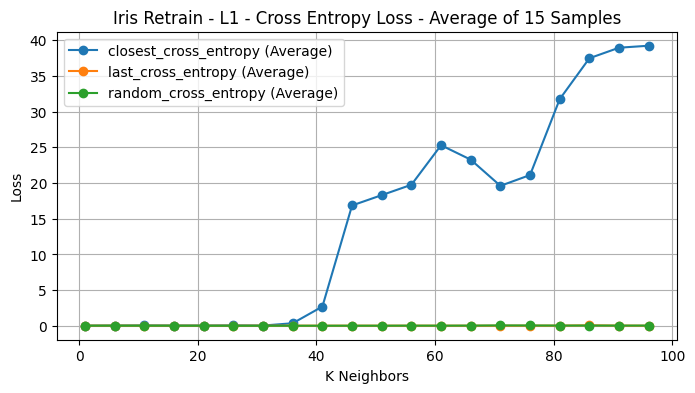

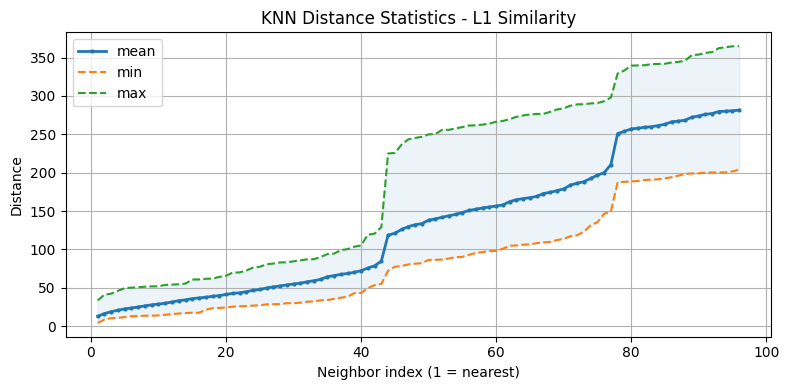

{'k': 96,
 'mean': [13.000798638661703,
  16.519169553120932,
  19.03883285522461,
  20.811542892456053,
  22.65801175435384,
  23.732110468546548,
  25.098744010925294,
  26.555878130594888,
  27.886589431762694,
  28.85679448445638,
  29.96715539296468,
  31.639566040039064,
  33.320624923706056,
  34.27505327860514,
  35.939853541056316,
  36.877302932739255,
  37.70800018310547,
  39.02062772115072,
  39.885935592651364,
  41.36472702026367,
  42.752859115600586,
  43.54308166503906,
  44.88510309855143,
  46.8185417175293,
  47.87466125488281,
  49.79574762980143,
  51.298047637939455,
  52.48025398254394,
  53.88553314208984,
  54.982631556193034,
  56.05551478068034,
  57.88026631673177,
  59.218867746988934,
  61.03034489949544,
  64.46212209065756,
  65.92858301798502,
  67.50955276489258,
  68.72350184122722,
  70.26232426961263,
  72.33304061889649,
  75.7450350443522,
  78.71632614135743,
  84.77446365356445,
  118.62760213216146,
  121.15077616373698,
  126.03990885416667,

In [36]:
with open('retrain_data/l1/random_indices_50.pkl', 'rb') as f:
    random_indices_l1 = pickle.load(f)

with open('retrain_data/l1/cross_results_50.pkl', 'rb') as f:
    cross_results_l1 = pickle.load(f)

with open('retrain_data/l1/knn_distances_50.pkl', 'rb') as f:
    knn_distances_l1 = pickle.load(f)

visualize_results(cross_results_l1, random_indices_l1, average=True, normalize=False, title=f"Iris Retrain - L1 - Cross Entropy Loss - Average of {len(random_indices_l1)} Samples", max_knn=max_knn)
plot_knn_distance_stats(knn_distances_l1, subset='closest',k=96, title="KNN Distance Statistics - L1 Similarity")

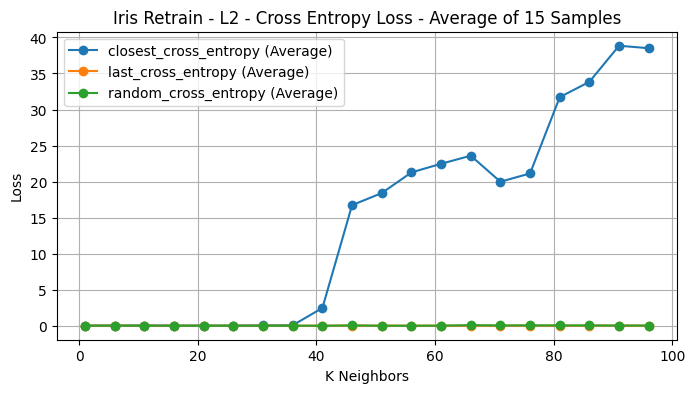

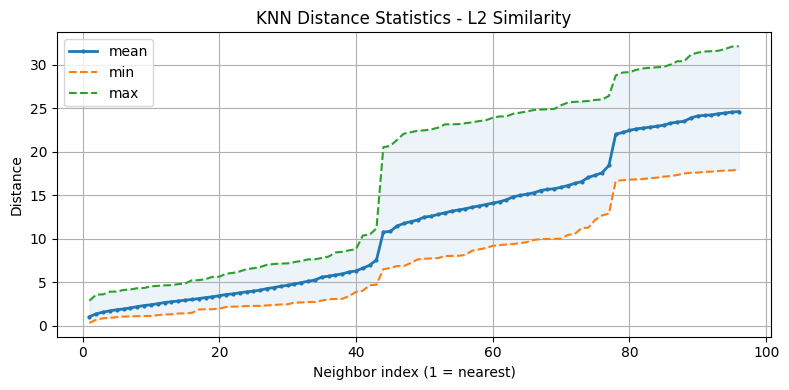

{'k': 96,
 'mean': [1.0415150145689647,
  1.3790987213452657,
  1.57280592918396,
  1.7255430579185487,
  1.8488404909769693,
  1.93136039574941,
  2.0618876695632933,
  2.2064245621363323,
  2.3293140808741253,
  2.4190221627553306,
  2.5400336186091104,
  2.6758299271265664,
  2.773386303583781,
  2.8514728307724,
  2.953157925605774,
  3.0252637465794883,
  3.1315513531366985,
  3.2444551547368365,
  3.3349034786224365,
  3.46227814356486,
  3.598489507039388,
  3.6709486484527587,
  3.791921059290568,
  3.9043708642323813,
  3.987634372711182,
  4.106145366032918,
  4.282186031341553,
  4.397371880213419,
  4.547687276204427,
  4.655820115407308,
  4.811828072865804,
  4.964715512593587,
  5.122758928934733,
  5.260696808497111,
  5.599939282735189,
  5.706382083892822,
  5.84190182685852,
  5.9699231624603275,
  6.187843322753906,
  6.305508057276408,
  6.6265361150105795,
  6.960578695933024,
  7.569529469807943,
  10.770200824737548,
  10.84080327351888,
  11.462861506144206,
  

In [35]:
with open('retrain_data/l2/random_indices_50.pkl', 'rb') as f:
    random_indices_l2 = pickle.load(f)

with open('retrain_data/l2/cross_results_50.pkl', 'rb') as f:
    cross_results_l2 = pickle.load(f)

with open('retrain_data/l2/knn_distances_50.pkl', 'rb') as f:
    knn_distances_l2 = pickle.load(f)

visualize_results(cross_results_l2, random_indices_l2, average=True, normalize=False, title=f"Iris Retrain - L2 - Cross Entropy Loss - Average of {len(random_indices_l2)} Samples", max_knn=max_knn)
plot_knn_distance_stats(knn_distances_l2, subset='closest',k=96, title="KNN Distance Statistics - L2 Similarity")

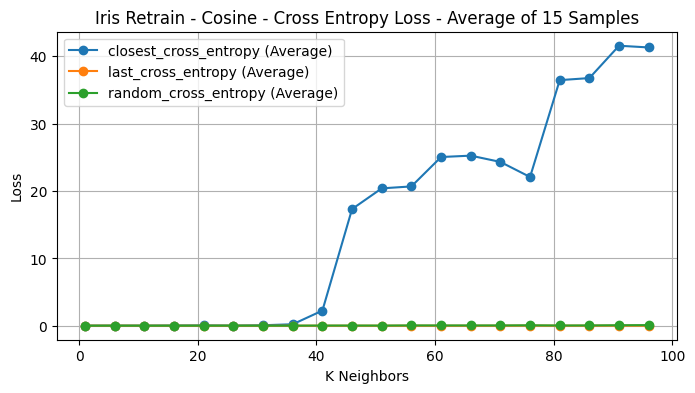

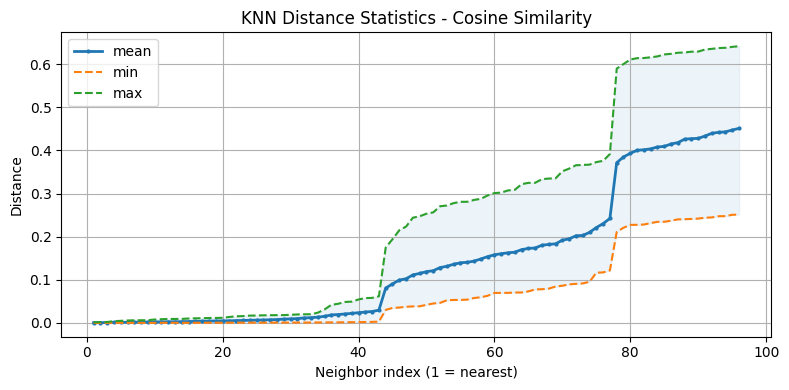

{'k': 96,
 'mean': [0.000376733144124349,
  0.000666499137878418,
  0.0008182168006896972,
  0.0010930895805358887,
  0.0012284398078918457,
  0.0014093995094299316,
  0.0016678690910339356,
  0.0017569740613301596,
  0.0018917640050252278,
  0.0021441380182902017,
  0.002342673142751058,
  0.0025638699531555175,
  0.002685840924580892,
  0.002896984418233236,
  0.003158744176228841,
  0.0035603801409403485,
  0.003846581776936849,
  0.0041731317838033044,
  0.0044323364893595375,
  0.004643921057383219,
  0.004871265093485514,
  0.0052872180938720705,
  0.005711225668589274,
  0.00604317585627238,
  0.0064225355784098305,
  0.006773507595062256,
  0.007253928979237875,
  0.007790040969848633,
  0.008691473801930746,
  0.0093382199605306,
  0.009975934028625488,
  0.011499075094858806,
  0.012092697620391845,
  0.013346234957377115,
  0.015233651796976725,
  0.018483622868855795,
  0.019335007667541503,
  0.020713559786478677,
  0.022127723693847655,
  0.023633519808451336,
  0.0252476

In [34]:
with open('retrain_data/cosine/random_indices_50.pkl', 'rb') as f:
    random_indices_cosine = pickle.load(f)

with open('retrain_data/cosine/cross_results_50.pkl', 'rb') as f:
    cross_results_cosine = pickle.load(f)

with open('retrain_data/cosine/knn_distances_50.pkl', 'rb') as f:
    knn_distances_cosine = pickle.load(f)

visualize_results(cross_results_cosine, random_indices_cosine, average=True, normalize=False, title=f"Iris Retrain - Cosine - Cross Entropy Loss - Average of {len(random_indices_cosine)} Samples", max_knn=max_knn)
plot_knn_distance_stats(knn_distances_cosine, subset='closest',k=96, title="KNN Distance Statistics - Retrain - Cosine Similarity")

{1: 0.012339445127023889, 6: 0.028267437190773136, 11: 0.04458382929201813, 16: 0.033126508951924434, 21: 0.0325642259463469, 26: 0.05141183254830442, 31: 0.030385528885805493, 36: 0.355576170606461, 41: 2.694422978232615, 46: 16.859974280248085, 51: 18.307341401527324, 56: 19.761543612678846, 61: 25.302940225601198, 66: 23.27810471057892, 71: 19.611066778500874, 76: 21.124670673906802, 81: 31.761054706573486, 86: 37.49167442321777, 91: 38.9689759572347, 96: 39.24644788106283}
{1: 0.012342385167842924, 6: 0.029386540599917528, 11: 0.03225319004509781, 16: 0.015421928259699295, 21: 0.020144487049147605, 26: 0.02132331968459719, 31: 0.049279651961387574, 36: 0.07570245431609995, 41: 2.4653590861087045, 46: 16.731747010101873, 51: 18.405701518058777, 56: 21.27253459294637, 61: 22.470383739471437, 66: 23.59374100367228, 71: 19.98348061243693, 76: 21.13019995043675, 81: 31.711932977040608, 86: 33.84108721415202, 91: 38.84844741821289, 96: 38.504289881388345}
{1: 0.020316762314269, 6: 0.0208

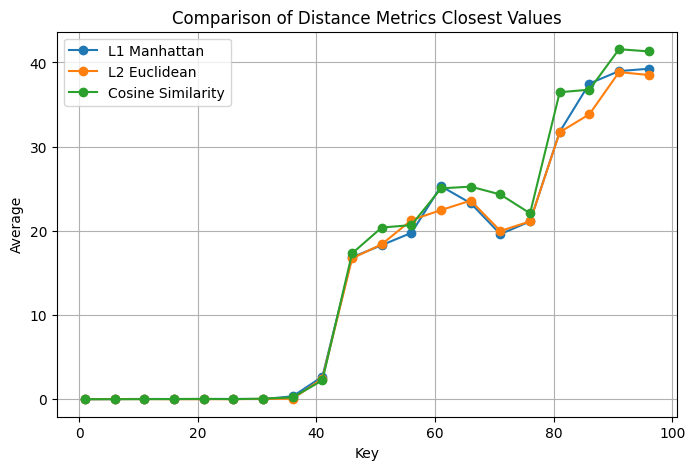

In [48]:
retrain_averages_l1 = {k: sum(v) / len(v) for k, v in cross_results_l1['closest_cross_entropy'].items()}
retrain_averages_l2 = {k: sum(v) / len(v) for k, v in cross_results_l2['closest_cross_entropy'].items()}
retrain_averages_cosine = {k: sum(v) / len(v) for k, v in cross_results_cosine['closest_cross_entropy'].items()}

print(retrain_averages_l1)
print(retrain_averages_l2)
print(retrain_averages_cosine)

datasets = [
    ("L1 Manhattan", retrain_averages_l1),
    ("L2 Euclidean", retrain_averages_l2),
    ("Cosine Similarity", retrain_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("Comparison of Distance Metrics Closest Values")
plt.xlabel("Key")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.show()

## Eval of Continue Training

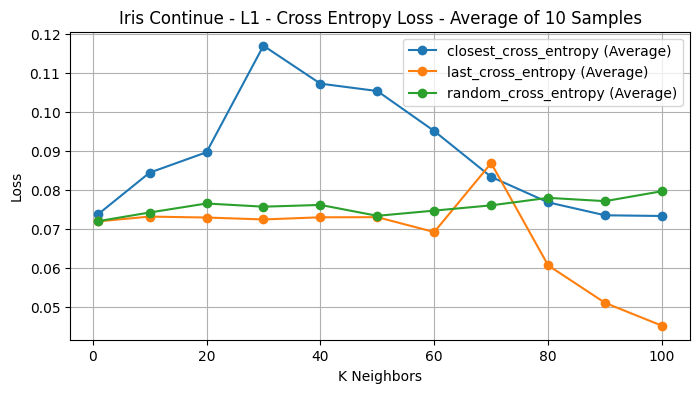

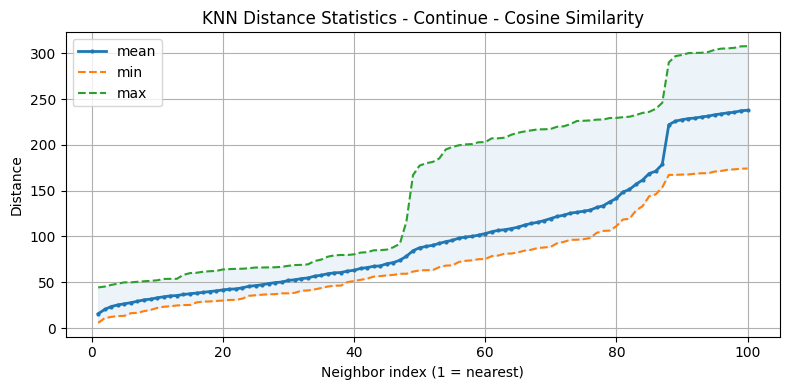

{'k': 100,
 'mean': [15.561642074584961,
  20.275372409820555,
  23.491919803619385,
  25.247388458251955,
  26.47516679763794,
  27.721690368652343,
  29.16205883026123,
  30.799328804016113,
  31.58491668701172,
  33.026685333251955,
  34.10112590789795,
  35.085618591308595,
  35.47467861175537,
  36.64055633544922,
  37.426268577575684,
  38.1816650390625,
  38.90667572021484,
  39.84518756866455,
  40.58733291625977,
  41.6305025100708,
  42.43854942321777,
  42.702844047546385,
  43.9632453918457,
  45.5839542388916,
  46.32791976928711,
  47.236384582519534,
  48.54896011352539,
  49.60928153991699,
  50.21433715820312,
  51.986908721923825,
  52.70904388427734,
  53.97065124511719,
  54.72936325073242,
  56.65377616882324,
  57.626242065429686,
  59.301059341430665,
  60.23211860656738,
  60.626549911499026,
  62.1484935760498,
  63.03963661193848,
  65.05178451538086,
  66.01800537109375,
  67.41666221618652,
  67.80886306762696,
  70.20374374389648,
  71.44082946777344,
  74.

In [37]:
with open('continue_data/l1/random_indices_50.pkl', 'rb') as f:
    con_random_indices_l1 = pickle.load(f)

with open('continue_data/l1/cross_results_50.pkl', 'rb') as f:
    con_cross_results_l1 = pickle.load(f)

with open('continue_data/l1/knn_distances_50.pkl', 'rb') as f:
    con_knn_distances_l1 = pickle.load(f)

visualize_results(con_cross_results_l1, con_random_indices_l1, average=True, normalize=False, title=f"Iris Continue - L1 - Cross Entropy Loss - Average of {len(con_random_indices_l1)} Samples", max_knn=max_knn)
plot_knn_distance_stats(con_knn_distances_l1, subset='closest',k=max_knn, title="KNN Distance Statistics - Continue - L1")

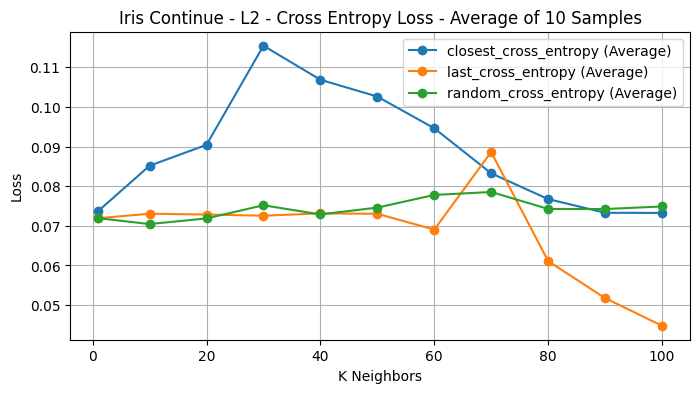

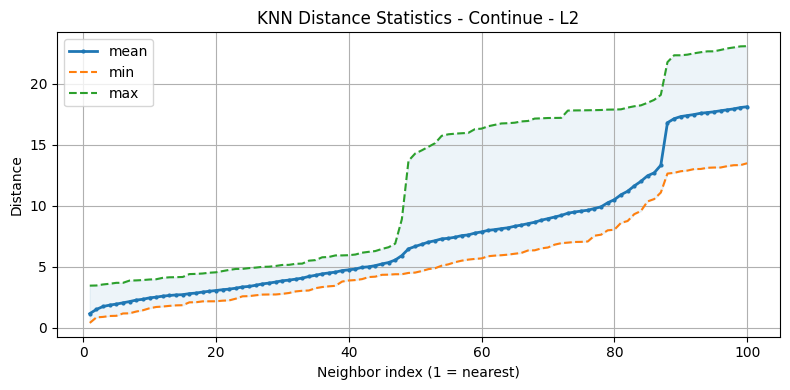

{'k': 100,
 'mean': [1.175017300248146,
  1.520242166519165,
  1.7584620058536529,
  1.8737367391586304,
  1.9574384808540344,
  2.0602888584136965,
  2.1642966508865356,
  2.284119176864624,
  2.350983774662018,
  2.467531740665436,
  2.5249659538269045,
  2.6092246890068056,
  2.6599793672561645,
  2.706584084033966,
  2.7293708443641664,
  2.8127278089523315,
  2.8594884395599367,
  2.9435906648635863,
  3.008038115501404,
  3.0676644086837768,
  3.1358432292938234,
  3.1828463077545166,
  3.2584434747695923,
  3.3622393131256105,
  3.4029861211776735,
  3.4999098062515257,
  3.6106372594833376,
  3.677671504020691,
  3.76392719745636,
  3.864707899093628,
  3.9207311391830446,
  3.9983634471893312,
  4.083312964439392,
  4.217191934585571,
  4.316104912757874,
  4.433393549919129,
  4.505893659591675,
  4.575798749923706,
  4.698949551582336,
  4.761900520324707,
  4.82973575592041,
  4.96274700164795,
  5.011005163192749,
  5.107859659194946,
  5.245321130752563,
  5.3601735115051

In [38]:
with open('continue_data/l2/random_indices_50.pkl', 'rb') as f:
    con_random_indices_l2 = pickle.load(f)

with open('continue_data/l2/cross_results_50.pkl', 'rb') as f:
    con_cross_results_l2 = pickle.load(f)

with open('continue_data/l2/knn_distances_50.pkl', 'rb') as f:
    con_knn_distances_l2 = pickle.load(f)

visualize_results(con_cross_results_l2, con_random_indices_l2, average=True, normalize=False, title=f"Iris Continue - L2 - Cross Entropy Loss - Average of {len(con_random_indices_l2)} Samples", max_knn=max_knn)
plot_knn_distance_stats(con_knn_distances_l2, subset='closest',k=max_knn, title="KNN Distance Statistics - Continue - L2")

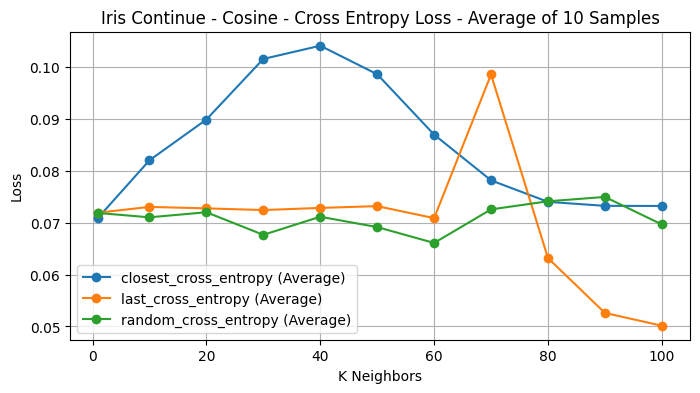

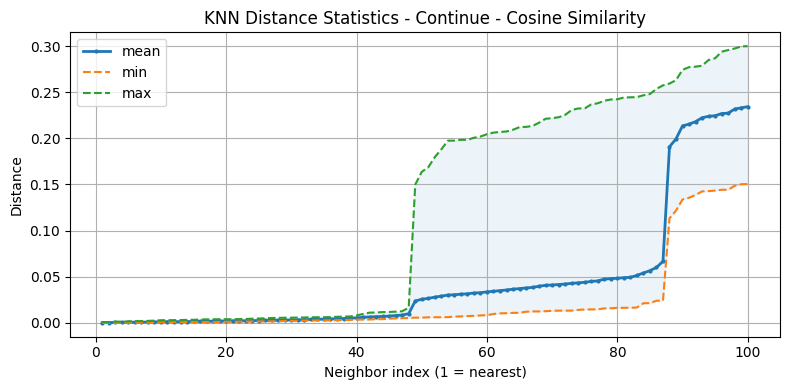

{'k': 100,
 'mean': [0.00023539066314697265,
  0.00034028887748718264,
  0.0004905104637145996,
  0.0005173683166503906,
  0.0006275653839111328,
  0.0007432103157043457,
  0.0008036136627197265,
  0.0009105682373046875,
  0.001046520471572876,
  0.0011501848697662354,
  0.0012103676795959472,
  0.0012742102146148682,
  0.0013460874557495116,
  0.001443493366241455,
  0.001530933380126953,
  0.0016589224338531493,
  0.0017363250255584717,
  0.0018509089946746825,
  0.0019452691078186036,
  0.0020098447799682616,
  0.0021363019943237303,
  0.002195227146148682,
  0.0023010611534118653,
  0.0024671852588653564,
  0.0025380611419677734,
  0.0026305973529815673,
  0.0027609944343566896,
  0.0028927981853485107,
  0.0030827343463897703,
  0.0032116293907165526,
  0.0033003270626068117,
  0.0034815788269042967,
  0.003699290752410889,
  0.003894031047821045,
  0.004046714305877686,
  0.0042572021484375,
  0.004536616802215576,
  0.004745447635650634,
  0.0050430774688720705,
  0.005450421571

In [39]:
with open('continue_data/cosine/random_indices_50.pkl', 'rb') as f:
    con_random_indices_cosine = pickle.load(f)

with open('continue_data/cosine/cross_results_50.pkl', 'rb') as f:
    con_cross_results_cosine = pickle.load(f)

with open('continue_data/cosine/knn_distances_50.pkl', 'rb') as f:
    con_knn_distances_cosine = pickle.load(f)

visualize_results(con_cross_results_cosine, con_random_indices_cosine, average=True, normalize=False, title=f"Iris Continue - Cosine - Cross Entropy Loss - Average of {len(con_random_indices_cosine)} Samples", max_knn=max_knn)
plot_knn_distance_stats(con_knn_distances_cosine, subset='closest',k=max_knn, title="KNN Distance Statistics - Continue - Cosine Similarity")

In [51]:
con_knn_distances_cosine['closest_distances']

{1: [[0.00043261051177978516],
  [0.00044476985931396484],
  [6.681680679321289e-05],
  [0.000791013240814209],
  [5.555152893066406e-05],
  [8.344650268554688e-06],
  [8.720159530639648e-05],
  [7.748603820800781e-06],
  [0.00044214725494384766],
  [1.7702579498291016e-05]],
 10: [[0.00043261051177978516,
   0.00043261051177978516,
   0.0004667043685913086,
   0.0005283355712890625,
   0.0005999207496643066,
   0.0007544755935668945,
   0.0007954835891723633,
   0.0008831024169921875,
   0.0008999109268188477,
   0.000991225242614746],
  [0.00044476985931396484,
   0.00044476985931396484,
   0.0005955696105957031,
   0.0006085634231567383,
   0.0006333589553833008,
   0.0008248090744018555,
   0.0008793473243713379,
   0.0009310245513916016,
   0.0009744763374328613,
   0.001011192798614502],
  [6.681680679321289e-05,
   0.0002560615539550781,
   0.0005709528923034668,
   0.0006021261215209961,
   0.0006339550018310547,
   0.0006885528564453125,
   0.0007488727569580078,
   0.00099486

{1: 0.07375190534803551, 10: 0.08435379034490324, 20: 0.08959313065279276, 30: 0.1168902697681915, 40: 0.10716986295883543, 50: 0.10527955475554336, 60: 0.09502117780211847, 70: 0.08327755343343597, 80: 0.0767571956384927, 90: 0.07343985933403019, 100: 0.0732577011687681}
{1: 0.07375190534803551, 10: 0.08516842080862261, 20: 0.09043969579506665, 30: 0.11546629626245704, 40: 0.106877001124667, 50: 0.10263315434858669, 60: 0.09462647323671262, 70: 0.08325599443342072, 80: 0.07675011422252283, 90: 0.07328384379216005, 100: 0.07324821230431552}
{1: 0.0710007178975502, 10: 0.08205115002638194, 20: 0.0899202990840422, 30: 0.10160533751477488, 40: 0.10415735421702266, 50: 0.09865771155164112, 60: 0.08700810445880051, 70: 0.07818553754477761, 80: 0.07403880658675917, 90: 0.07326729457417969, 100: 0.07324599466228392}


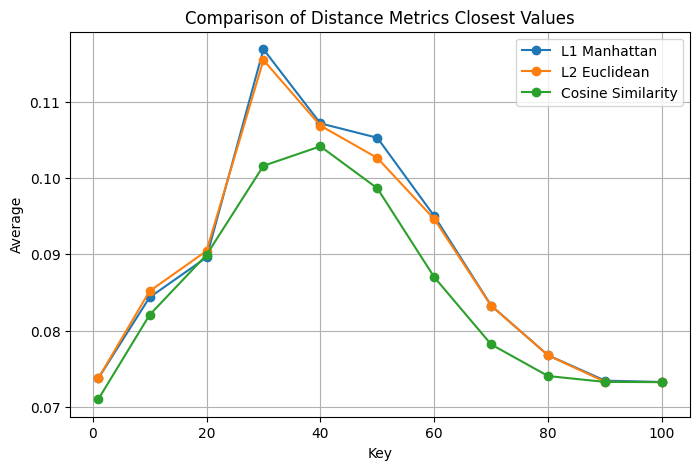

In [49]:
continue_averages_l1 = {k: sum(v) / len(v) for k, v in con_cross_results_l1['closest_cross_entropy'].items()}
continue_averages_l2 = {k: sum(v) / len(v) for k, v in con_cross_results_l2['closest_cross_entropy'].items()}
continue_averages_cosine = {k: sum(v) / len(v) for k, v in con_cross_results_cosine['closest_cross_entropy'].items()}

print(continue_averages_l1)
print(continue_averages_l2)
print(continue_averages_cosine)

datasets = [
    ("L1 Manhattan", continue_averages_l1),
    ("L2 Euclidean", continue_averages_l2),
    ("Cosine Similarity", continue_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("Comparison of Distance Metrics Closest Values")
plt.xlabel("Key")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.show()